# Project: NBA Game Revenue Optimization

1.Data Exploration and Cleaning:
Initial dataset exploration for structure, missing values, and anomalies.
Applied relevant preprocessing, handling missing values and outliers.

2.Exploratory Data Analysis (EDA)
box plot for all components potentially affect TotalRevenue

3.Feature Engineering & Pre-processing:
Dropped redundant columns.
One-hot encoded categorical variables.
Scaled numerical features with standardization.
Chose a neural network for its ability to capture complex relationships.
Trained the model on the training data, monitored MAE during training.
Model Evaluation:
Evaluated model performance on training and validation datasets.
Visualized MAE over epochs for insights and overfitting assessment.

4.Insights & Recommendations:
Extracted feature importance using SHAP values and Random Forest.
Provided recommendations based on insights for schedule optimization.

5.Schedule Optimization:
Utilized linear programming (LP) with pulp library to maximize revenue.
Objective: Maximize total expected revenue while adhering to constraints.
Proposed an optimal game schedule based on expected revenues.

# Step1 Data Exploration

In [20]:
import pandas as pd

# Load the data
data = pd.read_csv("/Users/tim/Desktop/study/Project/NBA hackthon/2023 Bucks Hackathon Mock Data2.csv")

# Inspect the first few rows of the data
data.head()


,SeasonKey,GameDate,GameTime,Month,DayOfWeek,DaysSinceHomeGame,Opponent,Temp,isRain,isSnow,IsHoliday,GiveawayBucket,TotalTickets,TotalAttendance,TotalRevenue
0,2015,10/28/2015,7:00,October,Wednesday,99,Toronto Raptors,43,0,0,0,None,16350.0,13950.0,1570000.0
1,2015,10/30/2015,7:00,October,Friday,2,Washington Wizards,46,0,0,0,None,17700.0,16600.0,1630000.0
2,2015,11/4/2015,7:00,November,Wednesday,5,Philadelphia 76ers,61,0,0,0,None,14000.0,11900.0,1170000.0
3,2015,11/7/2015,7:30,November,Saturday,3,Brooklyn Nets,39,0,0,0,None,18700.0,17150.0,1870000.0
4,2015,11/10/2015,7:00,November,Tuesday,3,Boston Celtics,41,0,0,0,None,14250.0,12550.0,1550000.0


In [21]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

SeasonKey            0
GameDate             0
GameTime             0
Month                0
DayOfWeek            0
DaysSinceHomeGame    0
Opponent             0
Temp                 0
isRain               0
isSnow               0
IsHoliday            0
GiveawayBucket       0
TotalTickets         0
TotalAttendance      0
 TotalRevenue        0
dtype: int64

In [22]:
# Generate descriptive statistics for key columns
descriptive_stats = data.describe()
descriptive_stats


,SeasonKey,DaysSinceHomeGame,Temp,isRain,isSnow,IsHoliday,TotalTickets,TotalAttendance,TotalRevenue
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,2.670000e+02
mean,2018.119850,6.734082,34.850187,0.108614,0.067416,0.071161,16901.310861,14588.202247,1.566217e+06
std,2.347743,15.459639,12.660401,0.311739,0.251211,0.257576,2153.055218,2157.597467,3.076181e+05
min,2015.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,11800.000000,8450.000000,7.800000e+05
25%,2016.000000,2.000000,28.000000,0.000000,0.000000,0.000000,15200.000000,13075.000000,1.350000e+06
50%,2018.000000,3.000000,36.000000,0.000000,0.000000,0.000000,17000.000000,14600.000000,1.550000e+06
75%,2021.000000,6.000000,43.000000,0.000000,0.000000,0.000000,18500.000000,16150.000000,1.750000e+06
max,2022.000000,99.000000,70.000000,1.000000,1.000000,1.000000,21400.000000,19650.000000,2.670000e+06


In [24]:
data.info()

data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SeasonKey          267 non-null    int64  
 1   GameDate           267 non-null    object 
 2   GameTime           267 non-null    object 
 3   Month              267 non-null    object 
 4   DayOfWeek          267 non-null    object 
 5   DaysSinceHomeGame  267 non-null    int64  
 6   Opponent           267 non-null    object 
 7   Temp               267 non-null    int64  
 8   isRain             267 non-null    int64  
 9   isSnow             267 non-null    int64  
 10  IsHoliday          267 non-null    int64  
 11  GiveawayBucket     267 non-null    object 
 12  TotalTickets       267 non-null    float64
 13  TotalAttendance    267 non-null    float64
 14   TotalRevenue      267 non-null    float64
dtypes: float64(3), int64(6), object(6)
memory usage: 31.4+ KB


Index(['SeasonKey', 'GameDate', 'GameTime', 'Month', 'DayOfWeek',
       'DaysSinceHomeGame', 'Opponent', 'Temp', 'isRain', 'isSnow',
       'IsHoliday', 'GiveawayBucket', 'TotalTickets', 'TotalAttendance',
       ' TotalRevenue '],
      dtype='object')

# Step 2: Exploratory Data Analysis (EDA)

C:\Users\tim\AppData\Local\Temp\ipykernel_16764\547777353.py:24: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  continuous_correlations = data[continuous_columns].corrwith(data[' TotalRevenue '])
C:\Users\tim\AppData\Local\Temp\ipykernel_16764\547777353.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_continuous_correlations.values, y=sorted_continuous_correlations.index, palette="coolwarm")


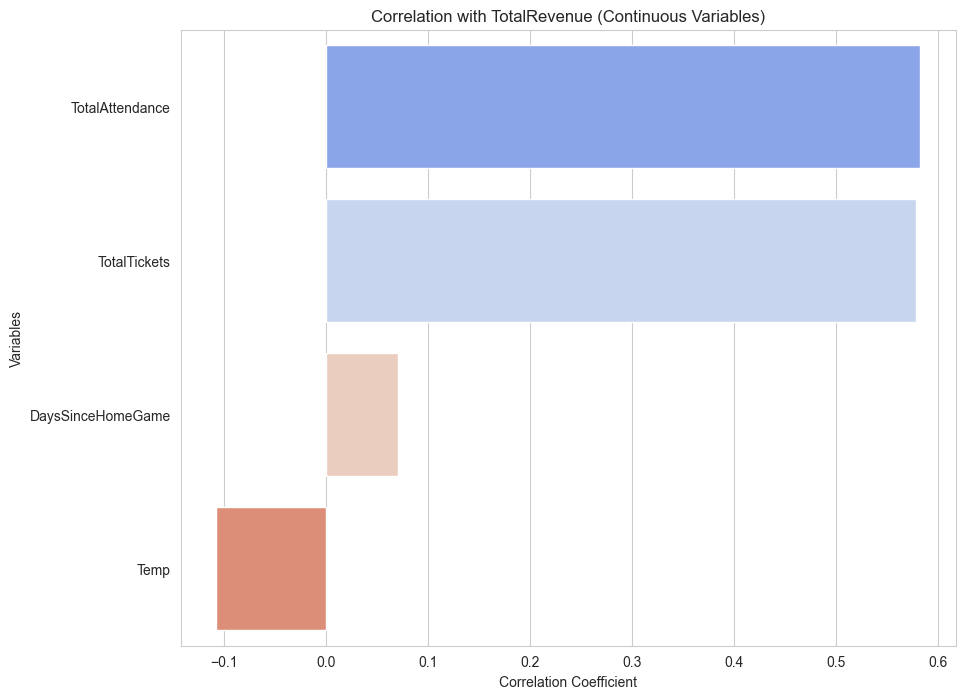

C:\Users\tim\AppData\Local\Temp\ipykernel_16764\547777353.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_binary_correlations.values, y=sorted_binary_correlations.index, palette="coolwarm")


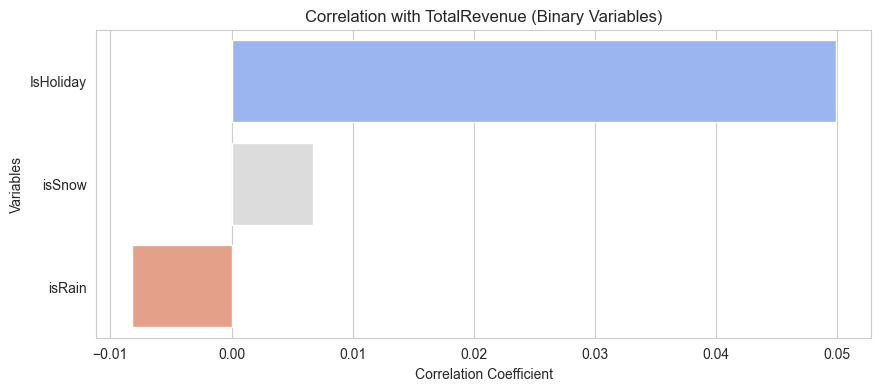

In [30]:
# Identify binary variables in the dataset
binary_columns = [col for col in data.columns if data[col].nunique() == 2]

binary_columns

from scipy.stats import pointbiserialr

# Calculate Point-Biserial Correlation for each binary variable with respect to 'TotalRevenue'
point_biserial_correlations = {}

for col in binary_columns:
    correlation, p_value = pointbiserialr(data[col], data[' TotalRevenue '])
    point_biserial_correlations[col] = correlation

point_biserial_correlations

# Separate the columns into continuous and binary variables
continuous_columns = [col for col in data.columns if col not in binary_columns + [' TotalRevenue ']]

# Remove 'SeasonKey' from the continuous columns list
continuous_columns.remove('SeasonKey')

# Compute correlations for continuous variables with respect to 'TotalRevenue'
continuous_correlations = data[continuous_columns].corrwith(data[' TotalRevenue '])


# Sort the correlations for better visualization
sorted_continuous_correlations = continuous_correlations.sort_values(ascending=False)

# Plot the correlations for continuous variables
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_continuous_correlations.values, y=sorted_continuous_correlations.index, palette="coolwarm")
plt.title('Correlation with TotalRevenue (Continuous Variables)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

# Plot the correlations for binary variables
sorted_binary_correlations = pd.Series(point_biserial_correlations).sort_values(ascending=False)
plt.figure(figsize=(10, 4))
sns.barplot(x=sorted_binary_correlations.values, y=sorted_binary_correlations.index, palette="coolwarm")
plt.title('Correlation with TotalRevenue (Binary Variables)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()



**Box Plot Figure**

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data loading and preprocessing (assuming your data is in 'data' DataFrame)

# Define custom color palettes for each variable based on median revenue

# Section 1
section1_vars = ['GameTime', 'Month', 'DayOfWeek']
section1_palettes = {}
for var in section1_vars:
    order = data.groupby(var)[' TotalRevenue '].median().sort_values().index
    colors = sns.color_palette("coolwarm", n_colors=order.size)
    section1_palettes[var] = dict(zip(order, colors))

# Section 2
section2_vars = ['GiveawayBucket']
section2_palettes = {}
for var in section2_vars:
    order = data.groupby(var)[' TotalRevenue '].median().sort_values().index
    colors = sns.color_palette("coolwarm", n_colors=order.size)
    section2_palettes[var] = dict(zip(order, colors))


# Section 3
section3_vars = ['Opponent', ]
section3_palettes = {}
for var in section3_vars:
    order = data.groupby(var)[' TotalRevenue '].median().sort_values().index
    colors = sns.color_palette("coolwarm", n_colors=order.size)
    section3_palettes[var] = dict(zip(order, colors))



C:\Users\tim\AppData\Local\Temp\ipykernel_16764\3263603509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=var, y=' TotalRevenue ', palette=section1_palettes[var], order=section1_palettes[var].keys())
C:\Users\tim\AppData\Local\Temp\ipykernel_16764\3263603509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=var, y=' TotalRevenue ', palette=section1_palettes[var], order=section1_palettes[var].keys())
C:\Users\tim\AppData\Local\Temp\ipykernel_16764\3263603509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(

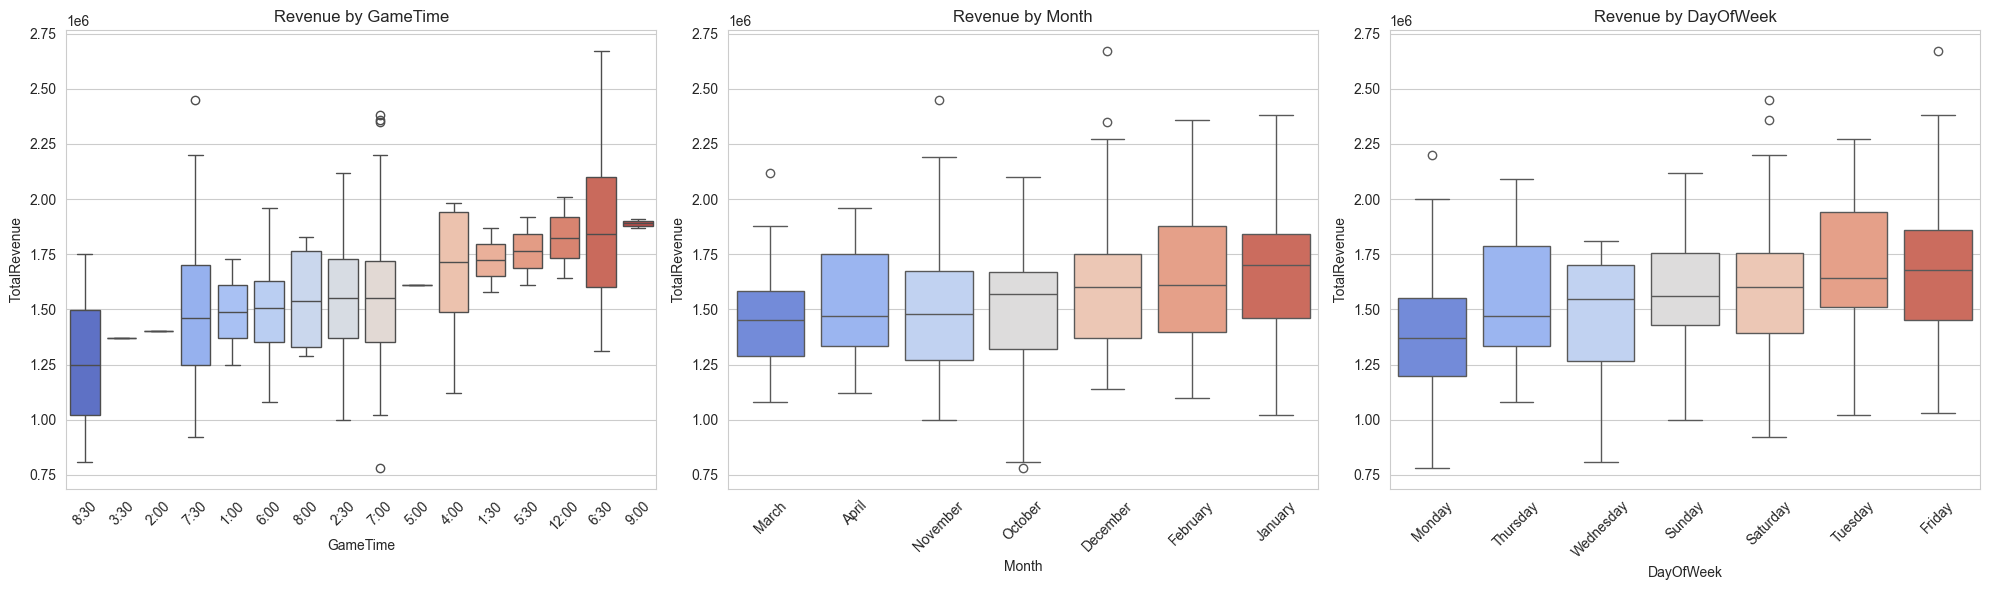

C:\Users\tim\AppData\Local\Temp\ipykernel_16764\3263603509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=var, y=' TotalRevenue ', palette=section2_palettes[var], order=section2_palettes[var].keys())


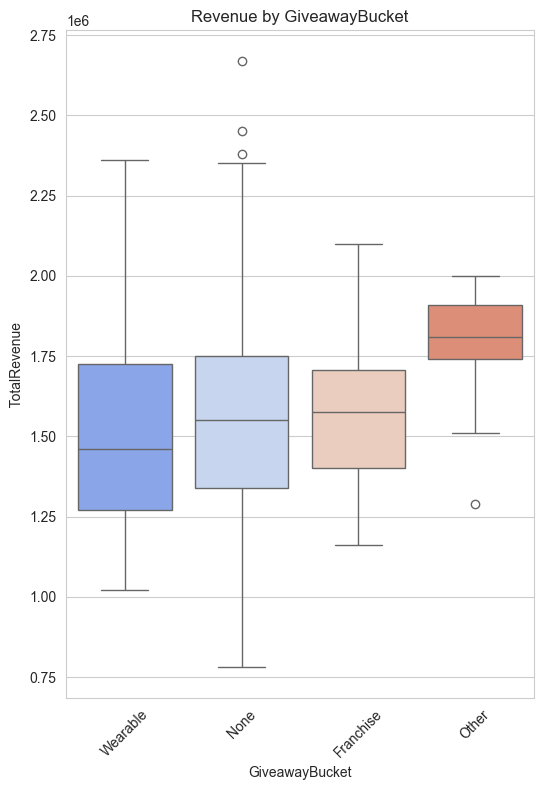

C:\Users\tim\AppData\Local\Temp\ipykernel_16764\3263603509.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Opponent', y=' TotalRevenue ', palette=section3_palettes['Opponent'], order=section3_palettes['Opponent'].keys())


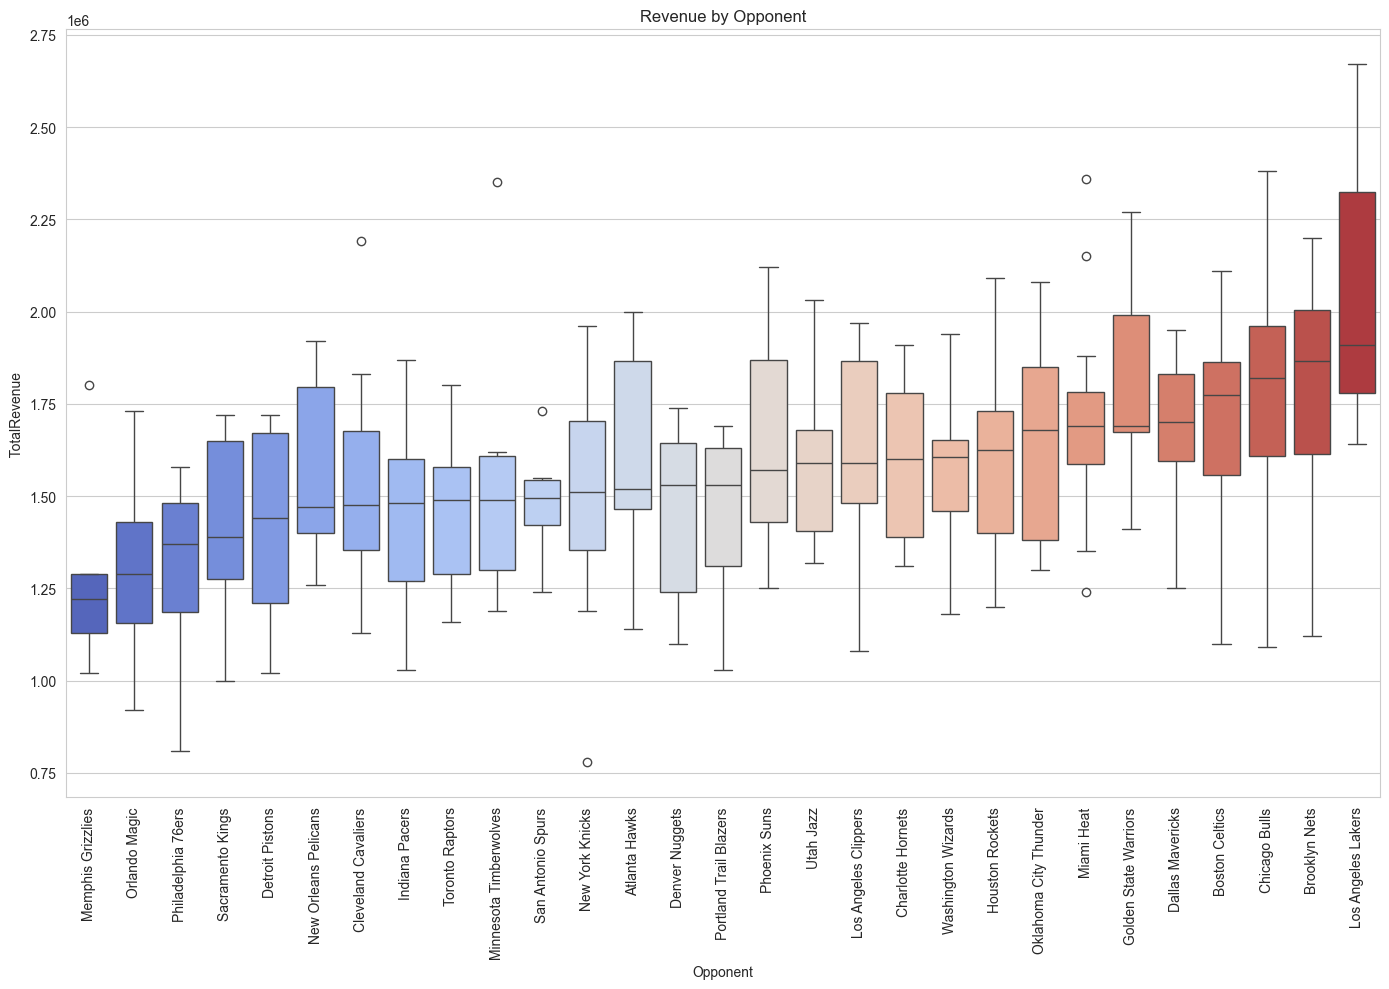

In [63]:
# Plotting Section 1
plt.figure(figsize=(20, 6))
for idx, var in enumerate(section1_vars, 1):
    plt.subplot(1, 3, idx)
    sns.boxplot(data=data, x=var, y=' TotalRevenue ', palette=section1_palettes[var], order=section1_palettes[var].keys())
    plt.title(f'Revenue by {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Section 2
plt.figure(figsize=(20, 8))
for idx, var in enumerate(section2_vars, 1):
    plt.subplot(1, 4, idx)
    sns.boxplot(data=data, x=var, y=' TotalRevenue ', palette=section2_palettes[var], order=section2_palettes[var].keys())
    plt.title(f'Revenue by {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Section 3
plt.figure(figsize=(14, 10))
sns.boxplot(data=data, x='Opponent', y=' TotalRevenue ', palette=section3_palettes['Opponent'], order=section3_palettes['Opponent'].keys())
plt.title('Revenue by Opponent')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Step 3: Feature Engineering and Selection

**Data Pre-processing**

**1.Remove SeasonKey and GameDate**

**2.Exclude TotalTickets and TotalAttendance for now**

In [67]:
# Dropping the columns as discussed
refined_data = data.drop(columns=['SeasonKey', 'GameDate', 'TotalTickets', 'TotalAttendance'])

# Splitting the dataset into predictors (X) and target variable (y)
X = refined_data.drop(columns=[' TotalRevenue '])
y = refined_data[' TotalRevenue ']

# Display the first few rows of X and y
print(X.head())
print(y.head())

  GameTime     Month  DayOfWeek  DaysSinceHomeGame            Opponent  Temp  \
0     7:00   October  Wednesday                 99     Toronto Raptors    43   
1     7:00   October     Friday                  2  Washington Wizards    46   
2     7:00  November  Wednesday                  5  Philadelphia 76ers    61   
3     7:30  November   Saturday                  3       Brooklyn Nets    39   
4     7:00  November    Tuesday                  3      Boston Celtics    41   

   isRain  isSnow  IsHoliday GiveawayBucket  
0       0       0          0           None  
1       0       0          0           None  
2       0       0          0           None  
3       0       0          0           None  
4       0       0          0           None  
0    1570000.0
1    1630000.0
2    1170000.0
3    1870000.0
4    1550000.0
Name:  TotalRevenue , dtype: float64


**One-hot Encoding: We'll convert the categorical variables (Opponent, Month, DayOfWeek, GameTime, and GiveawayBucket) into one-hot encoded variables**

**Feature Scaling**

In [69]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encoding the categorical variables
categorical_vars = ['Opponent', 'Month', 'DayOfWeek', 'GameTime', 'GiveawayBucket']
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(X[categorical_vars])

# Convert the one-hot encoded data to a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_vars))
X = pd.concat([X.drop(columns=categorical_vars), one_hot_df], axis=1)

# Scaling the numerical features
scaler = StandardScaler()
numerical_vars = ['Temp', 'DaysSinceHomeGame']
X[numerical_vars] = scaler.fit_transform(X[numerical_vars])

X.head()

e:\anaconda2\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,DaysSinceHomeGame,Temp,isRain,isSnow,IsHoliday,Opponent_Boston Celtics,Opponent_Brooklyn Nets,Opponent_Charlotte Hornets,Opponent_Chicago Bulls,Opponent_Cleveland Cavaliers,...,GameTime_6:00,GameTime_6:30,GameTime_7:00,GameTime_7:30,GameTime_8:00,GameTime_8:30,GameTime_9:00,GiveawayBucket_None,GiveawayBucket_Other,GiveawayBucket_Wearable
0,5.979388,0.644934,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.306797,0.882338,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.112379,2.069360,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.241991,0.328394,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.241991,0.486664,0,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((213, 63), (54, 63), (213,), (54,))

In [71]:
# Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense

# 1. Initialize the Model
model = Sequential()

# 2. Add Layers

# Input Layer
input_dim = X_train.shape[1]  # Number of features
model.add(Dense(128, input_dim=input_dim, activation='relu'))

# Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output Layer
model.add(Dense(1, activation='linear'))

# 3. Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# 4. Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 5. Evaluate the Model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Mean Absolute Error: ${mae:.2f}")

# 6. Hyperparameter Tuning (if needed)
# Based on the results and training/validation curves, consider adjusting hyperparameters or adding dropout layers.


Epoch 1/100
6/6 [==============================] - 2s 76ms/step - loss: 2540930334720.0000 - mean_absolute_error: 1564823.0000 - val_loss: 2545974247424.0000 - val_mean_absolute_error: 1557673.5000
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 2540927713280.0000 - mean_absolute_error: 1564822.2500 - val_loss: 2545971101696.0000 - val_mean_absolute_error: 1557672.6250
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 2540923781120.0000 - mean_absolute_error: 1564821.0000 - val_loss: 2545966383104.0000 - val_mean_absolute_error: 1557671.1250
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 2540918538240.0000 - mean_absolute_error: 1564819.2500 - val_loss: 2545959305216.0000 - val_mean_absolute_error: 1557668.8750
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 2540909887488.0000 - mean_absolute_error: 1564816.6250 - val_loss: 2545948295168.0000 - val_mean_absolute_error: 1557665.2500
Epoch 6/100
6/

Training MAE Range: 448914.125 - 1564823.0
Validation MAE Range: 449564.59375 - 1557673.5


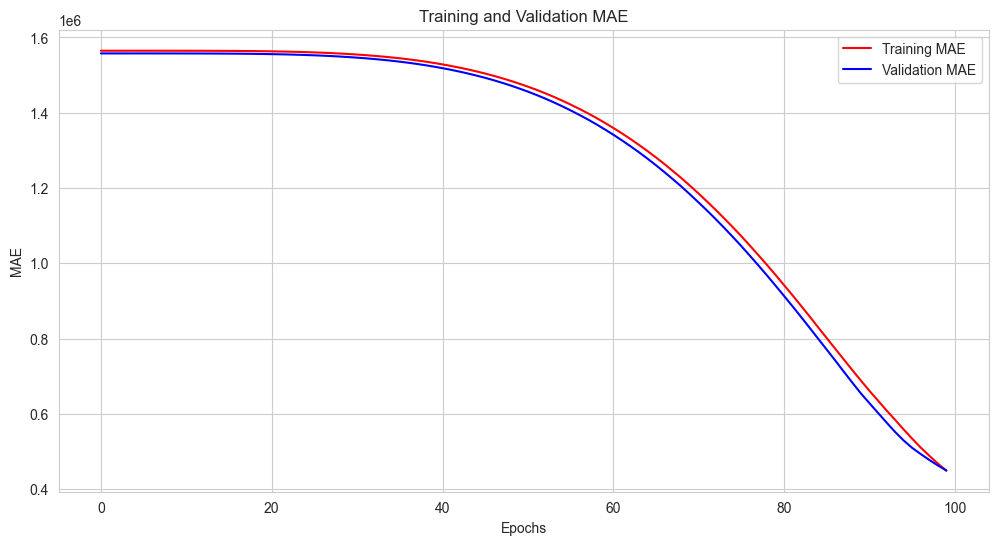

In [75]:
import matplotlib.pyplot as plt

# Extract MAE history for training and validation from the model's history
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

# Get the epochs
epochs = range(len(mae))

# Plot the MAE for training and validation
plt.figure(figsize=(12, 6))
plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Before applying the y-axis limits, let's check the range of MAE values
print(f"Training MAE Range: {min(mae)} - {max(mae)}")
print(f"Validation MAE Range: {min(val_mae)} - {max(val_mae)}")

# If the MAE values are within the [0, 100] range, then you can uncomment the line below. 
# Otherwise, consider adjusting the range or simply removing the ylim constraint.
# plt.ylim(ymax=100, ymin=0)

plt.show()


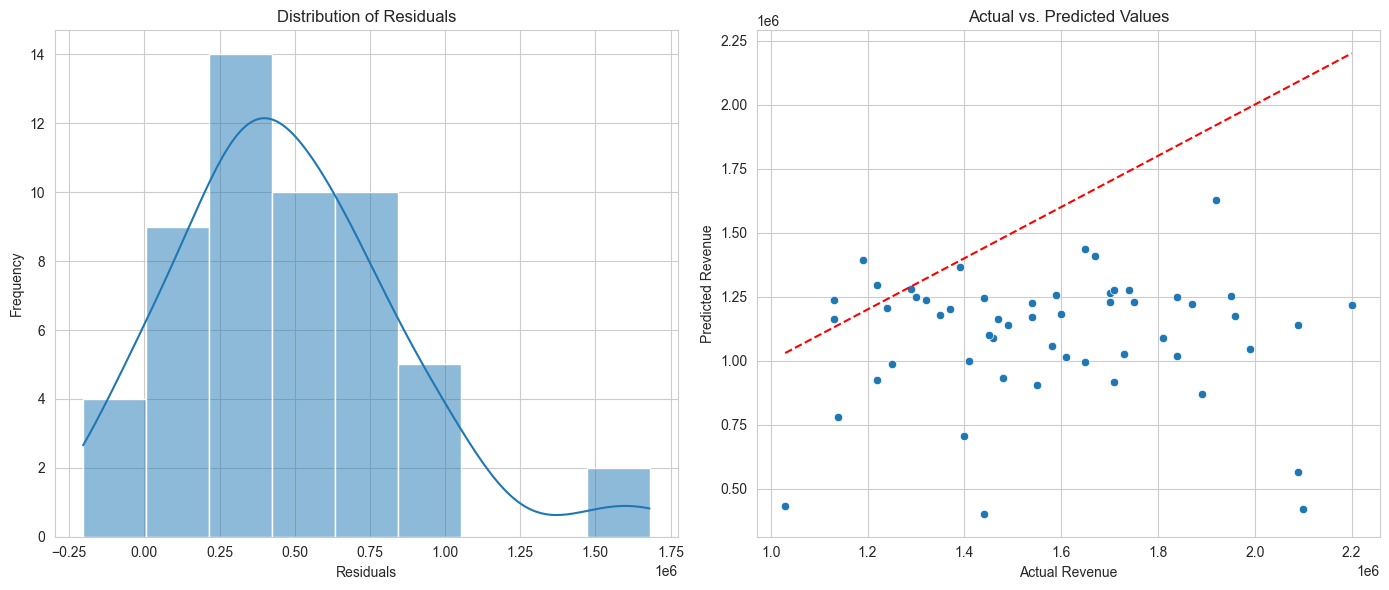

In [87]:
# Plotting residuals
plt.figure(figsize=(14, 6))

# Histogram of residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Scatter plot of actual vs. predicted values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=predicted_revenues.flatten())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

plt.tight_layout()
plt.show()


# Step 4 Insights & Recommendations

4/4 [==============================] - 0s 2ms/step


  0%|          | 0/54 [00:00<?, ?it/s]

313/313 [==============================] - 1s 2ms/step


  2%|▏         | 1/54 [00:04<04:07,  4.66s/it]

313/313 [==============================] - 1s 2ms/step


  4%|▎         | 2/54 [00:06<02:26,  2.81s/it]

313/313 [==============================] - 1s 2ms/step


  6%|▌         | 3/54 [00:07<01:51,  2.19s/it]

313/313 [==============================] - 1s 2ms/step


  7%|▋         | 4/54 [00:09<01:34,  1.90s/it]

313/313 [==============================] - 1s 2ms/step


  9%|▉         | 5/54 [00:10<01:24,  1.73s/it]

313/313 [==============================] - 1s 2ms/step


 11%|█         | 6/54 [00:11<01:18,  1.64s/it]

313/313 [==============================] - 1s 2ms/step


 13%|█▎        | 7/54 [00:13<01:13,  1.57s/it]

313/313 [==============================] - 1s 2ms/step


 15%|█▍        | 8/54 [00:14<01:11,  1.55s/it]

313/313 [==============================] - 1s 2ms/step


 17%|█▋        | 9/54 [00:16<01:08,  1.52s/it]

313/313 [==============================] - 1s 2ms/step


 19%|█▊        | 10/54 [00:17<01:05,  1.49s/it]

313/313 [==============================] - 1s 2ms/step


 20%|██        | 11/54 [00:19<01:03,  1.49s/it]

313/313 [==============================] - 1s 2ms/step


 22%|██▏       | 12/54 [00:20<01:01,  1.47s/it]

313/313 [==============================] - 1s 2ms/step


 24%|██▍       | 13/54 [00:22<01:00,  1.48s/it]

313/313 [==============================] - 1s 2ms/step


 26%|██▌       | 14/54 [00:23<00:59,  1.50s/it]

313/313 [==============================] - 1s 2ms/step


 28%|██▊       | 15/54 [00:25<00:58,  1.51s/it]

313/313 [==============================] - 1s 2ms/step


 30%|██▉       | 16/54 [00:26<00:57,  1.52s/it]

313/313 [==============================] - 1s 2ms/step


 31%|███▏      | 17/54 [00:28<00:55,  1.51s/it]

313/313 [==============================] - 1s 2ms/step


 33%|███▎      | 18/54 [00:29<00:53,  1.49s/it]

313/313 [==============================] - 1s 2ms/step


 35%|███▌      | 19/54 [00:31<00:51,  1.47s/it]

313/313 [==============================] - 1s 2ms/step


 37%|███▋      | 20/54 [00:32<00:50,  1.47s/it]

313/313 [==============================] - 1s 2ms/step


 39%|███▉      | 21/54 [00:34<00:48,  1.47s/it]

313/313 [==============================] - 1s 2ms/step


 41%|████      | 22/54 [00:35<00:46,  1.46s/it]

313/313 [==============================] - 1s 2ms/step


 43%|████▎     | 23/54 [00:37<00:45,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 44%|████▍     | 24/54 [00:38<00:43,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 46%|████▋     | 25/54 [00:39<00:41,  1.44s/it]

313/313 [==============================] - 1s 2ms/step


 48%|████▊     | 26/54 [00:41<00:40,  1.44s/it]

313/313 [==============================] - 1s 2ms/step


 50%|█████     | 27/54 [00:42<00:39,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 52%|█████▏    | 28/54 [00:44<00:37,  1.43s/it]

313/313 [==============================] - 1s 2ms/step


 54%|█████▎    | 29/54 [00:45<00:37,  1.49s/it]

313/313 [==============================] - 1s 2ms/step


 56%|█████▌    | 30/54 [00:47<00:35,  1.48s/it]

313/313 [==============================] - 1s 2ms/step


 57%|█████▋    | 31/54 [00:48<00:34,  1.48s/it]

313/313 [==============================] - 1s 2ms/step


 59%|█████▉    | 32/54 [00:50<00:32,  1.48s/it]

313/313 [==============================] - 1s 2ms/step


 61%|██████    | 33/54 [00:51<00:30,  1.46s/it]

313/313 [==============================] - 1s 2ms/step


 63%|██████▎   | 34/54 [00:53<00:29,  1.46s/it]

313/313 [==============================] - 1s 2ms/step


 65%|██████▍   | 35/54 [00:54<00:27,  1.46s/it]

313/313 [==============================] - 1s 2ms/step


 67%|██████▋   | 36/54 [00:56<00:26,  1.46s/it]

313/313 [==============================] - 1s 2ms/step


 69%|██████▊   | 37/54 [00:57<00:24,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 70%|███████   | 38/54 [00:58<00:23,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 72%|███████▏  | 39/54 [01:00<00:21,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 74%|███████▍  | 40/54 [01:01<00:20,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 76%|███████▌  | 41/54 [01:03<00:18,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 78%|███████▊  | 42/54 [01:04<00:17,  1.44s/it]

313/313 [==============================] - 1s 2ms/step


 80%|███████▉  | 43/54 [01:06<00:15,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 74 iterations, alpha=4.428e+02, previous alpha=1.349e+02, with an active set of 43 regressors.
 81%|████████▏ | 44/54 [01:07<00:14,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 83%|████████▎ | 45/54 [01:09<00:13,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 85%|████████▌ | 46/54 [01:10<00:11,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 87%|████████▋ | 47/54 [01:11<00:10,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 89%|████████▉ | 48/54 [01:13<00:08,  1.45s/it]

313/313 [==============================] - 1s 2ms/step


 91%|█████████ | 49/54 [01:14<00:07,  1.46s/it]

313/313 [==============================] - 1s 2ms/step


 93%|█████████▎| 50/54 [01:16<00:05,  1.47s/it]

313/313 [==============================] - 1s 2ms/step


 94%|█████████▍| 51/54 [01:17<00:04,  1.47s/it]

313/313 [==============================] - 1s 2ms/step


 96%|█████████▋| 52/54 [01:19<00:02,  1.46s/it]

313/313 [==============================] - 1s 2ms/step


 98%|█████████▊| 53/54 [01:20<00:01,  1.46s/it]

313/313 [==============================] - 1s 2ms/step


100%|██████████| 54/54 [01:22<00:00,  1.52s/it]


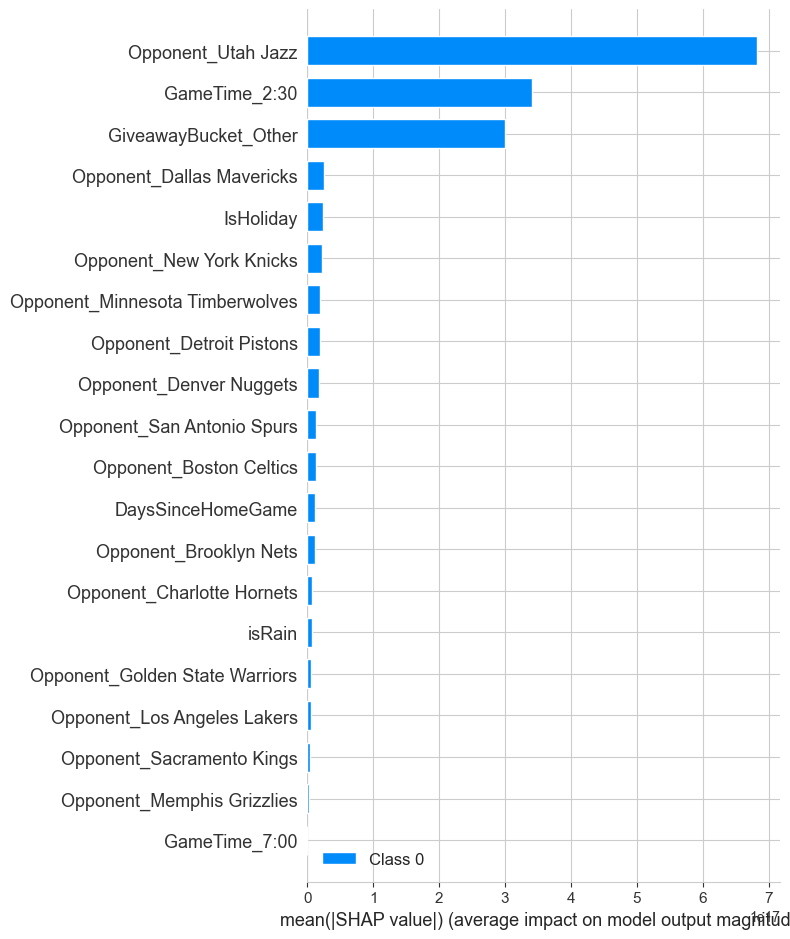

In [93]:
# Using KernelExplainer for the neural network model
background = X_train.iloc[:100].values  # Using a subset of the training data as background
explainer = shap.KernelExplainer(model.predict, background)

# Compute SHAP values for a sample of the test data
shap_values = explainer.shap_values(X_test.iloc[:100].values, nsamples=100)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test.iloc[:100], plot_type="bar")


**RamdonForest to extract feature importances**

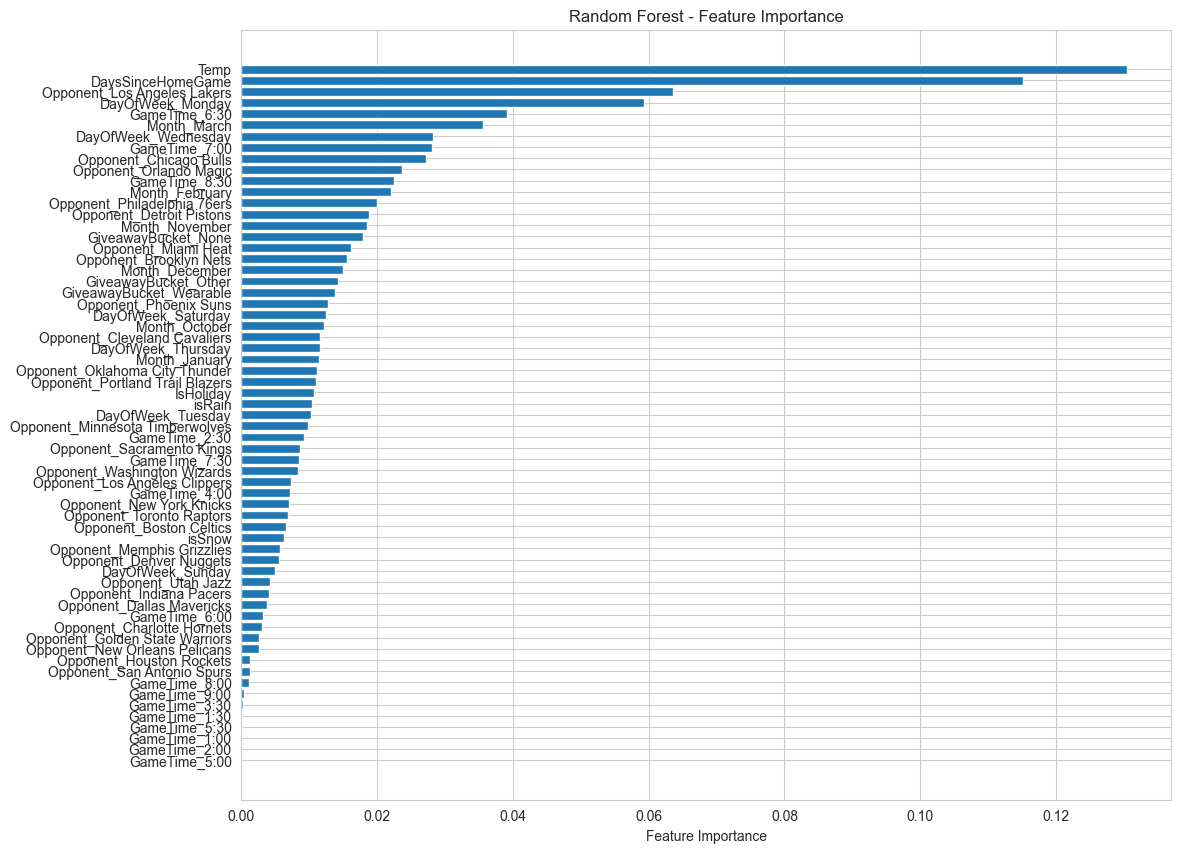

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_regressor.feature_importances_

# Sort the features based on importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Visualization
plt.figure(figsize=(12, 10))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()


# Step 5 Optimal Schedule Scenario(8 Games In Mouth)

1.Data Initialization:
Hypothetical month with 30 days.
Arbitrary revenue potential assigned based on day of the week, favoring weekends.

2.Linear Programming Setup:
Used pulp library to define and solve the linear programming problem.
Decision variables (x) represent game scheduling (1) or not (0) on specific dates.

3.Objective Function:
Maximize total expected revenue by summing x-revenue potential products.

4.Constraints:
Schedule a fixed number of games (10).
Avoid consecutive game days.
Unavailable stadium dates are unscheduled.

5.Solution:
Solve linear programming to find optimal revenue-maximizing game schedule.
Expected output: list of scheduled game dates for maximum revenue.
Systematic approach for scheduling games while optimizing revenue under constraints.

In [104]:
# Sample data based on our revenue potentials defined earlier
num_dates = 30
num_games = 8  # We want to schedule 8 games

# Example revenues based on our revenue potential definitions
estimated_revenues = [100000 * potential for potential in revenue_potentials]

# Set up the linear programming problem
lp_problem = pulp.LpProblem("Game_Scheduling", pulp.LpMaximize)

# Define the decision variables: 1 if game scheduled on date i, 0 otherwise
x = pulp.LpVariable.dicts("date", range(1, num_dates + 1), cat="Binary")

# Objective function: Maximize total expected revenue
lp_problem += pulp.lpSum([x[i] * estimated_revenues[i - 1] for i in range(1, num_dates + 1)])

# Constraints

# Schedule exactly 8 games
lp_problem += pulp.lpSum(x) == num_games

# No two games on consecutive dates
for i in range(1, num_dates):
    lp_problem += x[i] + x[i + 1] <= 1

# Solve the problem
lp_problem.solve()

# Extract the optimal schedule
optimal_schedule = [i for i in range(1, num_dates + 1) if x[i].value() == 1]

optimal_schedule


[1, 6, 8, 10, 13, 21, 27, 30]